# TODO

## Data Sections
- Exp-to-Non exp productivity ratio matrix
- Domestic Owned Exporter / Non-Exporter KS [All Ps]
- Exporter / Non-Exporter KS for all sizes [All Ps]
- All Firms Exp / nExp KS [Comparison of Ps]


## Hypotheses
- Exporter >= Non-Exporter [All categories]
- Smaller firms are more sensitive to export status
- Less productive firms are more sensitive to export status
- Foreign-Owned firms are less sensitive to export status

In [74]:
import pandas as pd
import numpy as np
from scipy.stats import kstest

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# mpl.rcParams['figure.dpi'] = 300 # Uncomment when getting figures for the paper

In [97]:
def safeint(x): 
    try:
        return int(x.strip().replace(',', ''))
    except:
        return np.nan
    
fmt_df = pd.DataFrame(
    index=[
        "p10",
        "p25",
        "p50",
        "p75",
        "p90",
    ]
)
df = pd.read_csv("data.csv", encoding="utf-8", low_memory=False)
df.columns = df.columns.str.strip()

num_cols = ['Mean', 'SD', 'p10', 'p25', 'p50', 'p75', 'p90', 'N']
for col in num_cols:
    df[col] = df[col].apply(safeint)

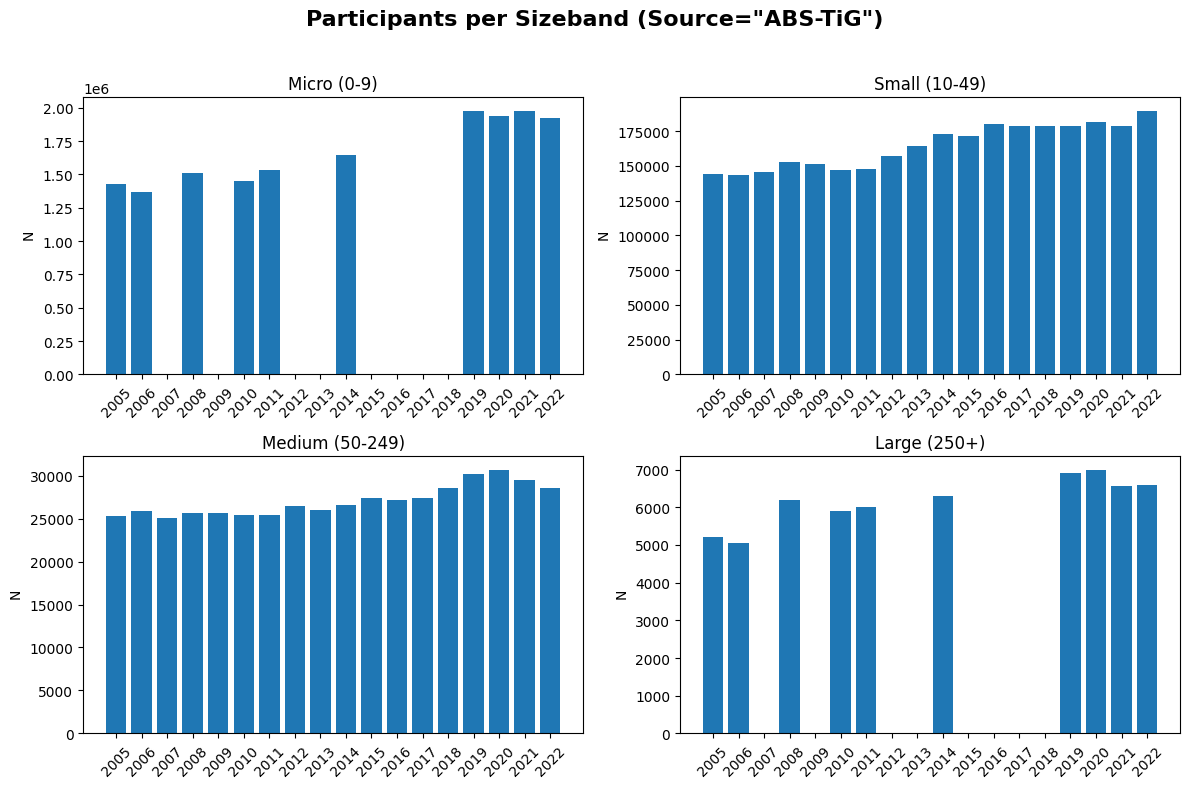

In [76]:
# Participants per Sizeband (source=ABS-TiG)

t = pd.period_range(start='2005', end='2022', freq='Y').year.astype(str)
sizeband_df = df.loc[(df['Dimension'] == '2. Sizeband') & (df['Source'] == 'ABS-TiG'), :]
micro = sizeband_df.loc[sizeband_df['Category'] == 'Micro (0-9)', :]
small = sizeband_df.loc[sizeband_df['Category'] == 'Small (10-49)', :]
medium = sizeband_df.loc[sizeband_df['Category'] == 'Medium (50-249)', :]
large = sizeband_df.loc[sizeband_df['Category'] == 'Large (250+)', :]

microN = micro.groupby('Year')['N'].sum().values
smallN = small.groupby('Year')['N'].sum().values
mediumN = medium.groupby('Year')['N'].sum().values
largeN = large.groupby('Year')['N'].sum().values



fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

ax[0].bar(t, microN)
ax[0].set_title('Micro (0-9)')
ax[0].set_ylabel(r"$\mathrm{N}$")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(t, smallN)
ax[1].set_title('Small (10-49)')
ax[1].set_ylabel(r"$\mathrm{N}$")
ax[1].tick_params(axis='x', rotation=45)

ax[2].bar(t, mediumN)
ax[2].set_title('Medium (50-249)')
ax[2].set_ylabel(r"$\mathrm{N}$")
ax[2].tick_params(axis='x', rotation=45)

ax[3].bar(t, largeN)
ax[3].set_title('Large (250+)')
ax[3].set_ylabel(r"$\mathrm{N}$")
ax[3].tick_params(axis='x', rotation=45)


plt.suptitle('Participants per Sizeband (Source="ABS-TiG")', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

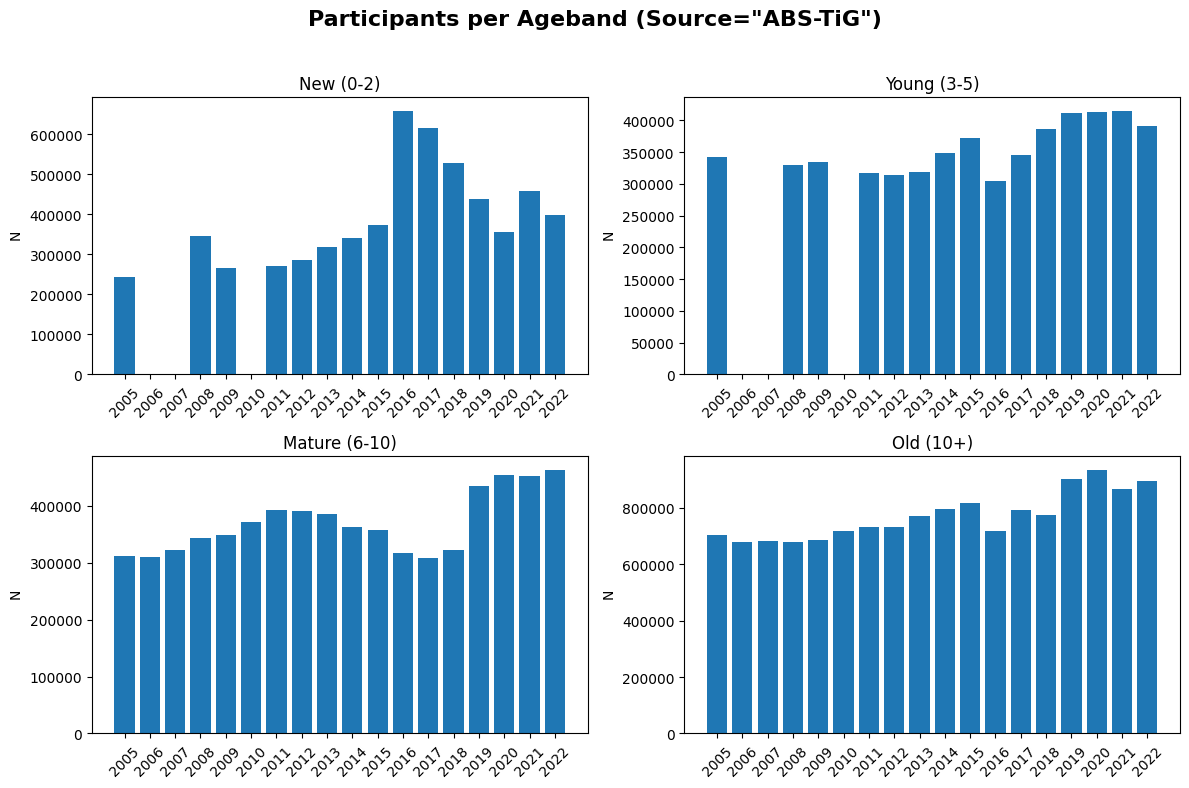

In [77]:
# Participants per Ageband (source=ABS-TiG)
ageband_df = df.loc[(df['Dimension'] == '5. Ageband') & (df['Source'] == 'ABS-TiG'), :]
new = ageband_df.loc[ageband_df['Category'] == 'New (0-2)', :]
young = ageband_df.loc[ageband_df['Category'] == 'Young (3-5)', :]
mature = ageband_df.loc[ageband_df['Category'] == 'Mature (6-10)', :]
old = ageband_df.loc[ageband_df['Category'] == 'Old (10+)', :]

newN = new.groupby('Year')['N'].sum().values
youngN = young.groupby('Year')['N'].sum().values
matureN = mature.groupby('Year')['N'].sum().values
oldN = old.groupby('Year')['N'].sum().values

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

ax[0].bar(t, newN)
ax[0].set_title('New (0-2)')
ax[0].set_ylabel(r"$\mathrm{N}$")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(t, youngN)
ax[1].set_title('Young (3-5)')
ax[1].set_ylabel(r"$\mathrm{N}$")
ax[1].tick_params(axis='x', rotation=45)

ax[2].bar(t, matureN)
ax[2].set_title('Mature (6-10)')
ax[2].set_ylabel(r"$\mathrm{N}$")
ax[2].tick_params(axis='x', rotation=45)

ax[3].bar(t, oldN)
ax[3].set_title('Old (10+)')
ax[3].set_ylabel(r"$\mathrm{N}$")
ax[3].tick_params(axis='x', rotation=45)

plt.suptitle('Participants per Ageband (Source="ABS-TiG")', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

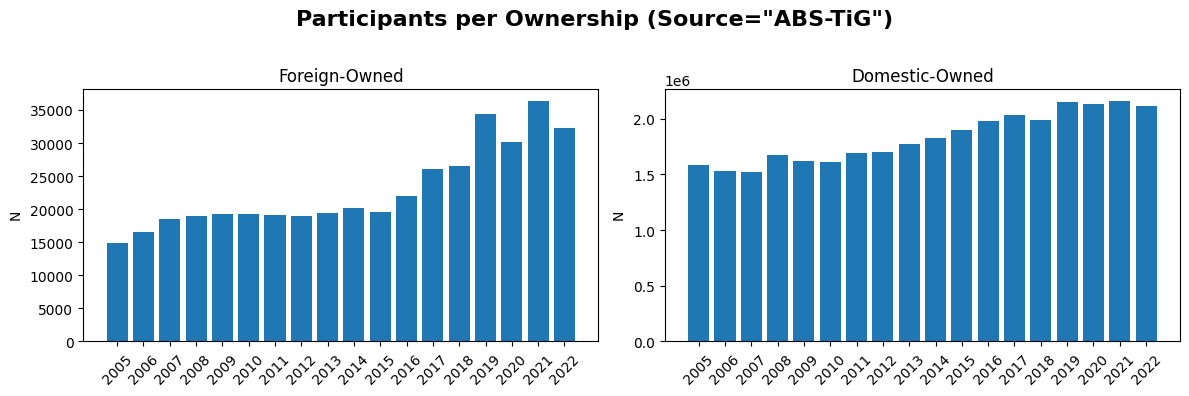

In [78]:
# Participants per Ownership (source=ABS-TiG)
ownership_df = df.loc[(df['Dimension'] == '4. Foreign Ownership') & (df['Source'] == 'ABS-TiG'), :]
foreign = ownership_df.loc[ownership_df['Category'] == 'Foreign-Owned', :]
domestic = ownership_df.loc[ownership_df['Category'] == 'Domestic-Owned', :]

foreignN = foreign.groupby('Year')['N'].sum().values
domesticN = domestic.groupby('Year')['N'].sum().values

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.flatten()

ax[0].bar(t, foreignN)
ax[0].set_title('Foreign-Owned')
ax[0].set_ylabel(r"$\mathrm{N}$")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(t, domesticN)
ax[1].set_title('Domestic-Owned')
ax[1].set_ylabel(r"$\mathrm{N}$")
ax[1].tick_params(axis='x', rotation=45)

plt.suptitle('Participants per Ownership (Source="ABS-TiG")', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [79]:
df.loc[df['Dimension'] == '2. Sizeband']

,Year,Metric,Dimension,Category,Status,Source,Mean,SD,p10,p25,p50,p75,p90,N
60,2011,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,96500,307500,18500,37000,64500,107000,176500,2150
61,2012,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,97500,255500,19000,37000,64500,107500,182000,2250
62,2013,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,96000,216500,20000,39000,67000,109500,178500,2400
63,2014,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,99000,207000,22500,40500,70000,114000,183500,2500
64,2015,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,97500,217000,24000,41000,68000,110500,184500,2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,42500,100000,7000,14500,29000,54000,86000,140000
296,2019,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,43000,120500,6000,14000,30500,55000,89500,139300
297,2020,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,39500,144500,2000,8500,25000,50000,85500,144850
298,2021,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,44500,302000,3000,11000,28000,57500,97500,140700


In [80]:
kstest(
    df.loc[df['Status'] == 'Exporter', 'Mean'],
    df.loc[df['Status'] == 'Non-Exporter', 'Mean']
)

KstestResult(statistic=np.float64(0.7055555555555556), pvalue=np.float64(1.78038136333646e-215), statistic_location=np.int64(56000), statistic_sign=np.int8(-1))

In [ ]:
Qs = ["p10", "p25", "p50", "p75", "p90"]
sizes = ['Small (10-49)', 'Medium (50-249)', 'Large (250+)']
status = ["Exporter", "Non-Exporter"]

exp_nexp_df = pd.DataFrame(
    index=fmt_df.index,
    columns=sizes
)

for i, q in enumerate(Qs):
    for size in sizes:
        samp1 = df.loc[(df["Status"] == "Exporter") & (df['Category'] == size), q].dropna()
        samp2 = df.loc[(df["Status"] == "Non-Exporter") & (df['Category'] == size), q].dropna()
        exp_nexp_df.loc[q, size] = kstest(samp1, samp2).pvalue
print("Exporter vs Non-Exporter KS test per sizeband [PVAL]")
exp_nexp_df.round(6)

Exporter vs Non-Exporter KS test per sizeband [PVAL]


,Small (10-49),Medium (50-249),Large (250+)
p10,0.0,0.0,0.0
p25,0.0,0.0,0.0
p50,0.0,0.0,0.0
p75,0.0,0.0,0.0
p90,0.0,0.0,0.0


In [100]:
sizes = ['Small (10-49)', 'Medium (50-249)', 'Large (250+)']

sizecomp_exp_df = pd.DataFrame(
    columns=sizes,
    index=sizes
)

samp = df.loc[df['Status'] == 'Exporter']
for i in sizes:
    for j in sizes:
        samp1 = samp.loc[samp['Category'] == i, 'p50'].dropna()
        samp2 = samp.loc[samp['Category'] == j, 'p50'].dropna()
        sizecomp_exp_df.loc[i, j] = kstest(samp1, samp2).pvalue

print("Exporter Sizeband Comparison KS test [PVAL]")
sizecomp_exp_df.round(6)

Exporter Sizeband Comparison KS test [PVAL]


,Small (10-49),Medium (50-249),Large (250+)
Small (10-49),1.0,0.392945,0.001347
Medium (50-249),0.392945,1.0,0.03452
Large (250+),0.001347,0.03452,1.0


In [102]:
sizecomp_nexp_df = pd.DataFrame(
    columns=sizes,
    index=sizes
)

samp = df.loc[df['Status'] == 'Non-Exporter']
for i in sizes:
    for j in sizes:
        samp1 = samp.loc[samp['Category'] == i, 'p50'].dropna()
        samp2 = samp.loc[samp['Category'] == j, 'p50'].dropna()

        sizecomp_nexp_df.loc[i, j] = kstest(samp1, samp2).pvalue

print("Non-Exporter Sizeband Comparison KS test [PVAL]")
sizecomp_nexp_df.round(6)

Non-Exporter Sizeband Comparison KS test [PVAL]


,Small (10-49),Medium (50-249),Large (250+)
Small (10-49),1.0,0.000001,0.678914
Medium (50-249),0.000001,1.0,0.000055
Large (250+),0.678914,0.000055,1.0


In [113]:
Q_comp_df = pd.DataFrame(
    columns=['Foreign-Owned', 'Domestic-Owned'],
    index=Qs
)
for i in Qs:
    for j in Q_comp_df.columns:
        samp1 = df.loc[(df['Category'] == j) & (df['Status'] == 'Exporter'), i].dropna()
        samp2 = df.loc[(df['Category'] == j) & (df['Status'] == 'Non-Exporter'), i].dropna()
        Q_comp_df.loc[i, j] = kstest(samp1, samp2).pvalue

print("Exporter vs Non-Exporter KS test per ownership type [PVAL]")
Q_comp_df.round(6)

Exporter vs Non-Exporter KS test per ownership type [PVAL]


,Foreign-Owned,Domestic-Owned
p10,0.0,0.0
p25,0.0,0.0
p50,0.0,0.0
p75,0.015643,0.0
p90,0.594071,0.0


In [109]:
# All categories Exporters vs Non-Exporters
samp1 = df.loc[(df['Status'] == 'Exporter') & (df['Dimension'] == '1. All'), :]
samp2 = df.loc[(df['Status'] == 'Non-Exporter') & (df['Dimension'] == '1. All'), :]

exp_nexp_all_df = fmt_df.copy()
pvals = []
stats = []
for q in Qs:
    samp1_q = samp1[q].dropna()
    samp2_q = samp2[q].dropna()
    res = kstest(samp1_q, samp2_q)
    stat, pval = (res.statistic, res.pvalue)
    pvals.append(pval)
    stats.append(stat)
exp_nexp_all_df['pval'] = pvals
exp_nexp_all_df['stat'] = stats
print("Exporter vs Non-Exporter KS test for All Categories [PVAL]")
exp_nexp_all_df

Exporter vs Non-Exporter KS test for All Categories [PVAL]


,pval,stat
p10,8.466416e-10,0.8
p25,1.691123e-17,1.0
p50,1.691123e-17,1.0
p75,1.691123e-17,1.0
p90,1.691123e-17,1.0


In [106]:
t_idx = [
    '2005 (ABS-TiG)', 
    '2006 (ABS-TiG)', 
    '2007 (ABS-TiG)', 
    '2008 (ABS-TiG)', 
    '2009 (ABS-TiG)', 
    '2010 (ABS-TiG)', 
    '2011 (ABS-TiG)',
    '2011 (ABS)',
    '2012 (ABS-TiG)',
    '2012 (ABS)',
    '2013 (ABS-TiG)',
    '2013 (ABS)',
    '2014 (ABS-TiG)',
    '2014 (ABS)',
    '2015 (ABS-TiG)',
    '2015 (ABS)',
    '2016 (ABS-TiG)',
    '2016 (ABS)',
    '2017 (ABS-TiG)',
    '2017 (ABS)',
    '2018 (ABS-TiG)',
    '2018 (ABS)',
    '2019 (ABS-TiG)',
    '2019 (ABS)',
    '2020 (ABS-TiG)',
    '2020 (ABS)',
    '2021 (ABS-TiG)',
    '2021 (ABS)',
    '2022 (ABS-TiG)',
    '2022 (ABS)',
         ]
exp_distributions_df = pd.DataFrame(
    columns=[],
    index=[
        "p10",
        "p25",
        "p50",
        "p75",
        "p90",
    ]
)
data = df.loc[(df['Dimension'] == '1. All') & (df['Status'] == 'Exporter'), :]
for i in t_idx:
    year, source = i.split(' ')
    source = source.strip('()')

    for q in Qs:
        obs = data.loc[(data['Year'] == int(year)) & (data['Source'] == source), q]
        exp_distributions_df.loc[q, i] = obs.values[0]
print("Exporter Distributions over Years and Sources")
exp_distributions_df.T.astype(int).to_latex("paper/python_tabular/edist_exp.tex")
exp_distributions_df.T

Exporter Distributions over Years and Sources


,p10,p25,p50,p75,p90
2005 (ABS-TiG),9000.0,26000.0,54000.0,98000.0,180500.0
2006 (ABS-TiG),9000.0,27500.0,54500.0,100500.0,175500.0
2007 (ABS-TiG),6000.0,30500.0,60500.0,109000.0,178000.0
2008 (ABS-TiG),7500.0,27500.0,53500.0,99000.0,173500.0
2009 (ABS-TiG),6500.0,24500.0,50500.0,87500.0,154000.0
2010 (ABS-TiG),5500.0,24000.0,53000.0,94500.0,165000.0
2011 (ABS-TiG),8500.0,29000.0,56500.0,99500.0,165500.0
2011 (ABS),4500.0,23000.0,51000.0,92000.0,153000.0
2012 (ABS-TiG),8000.0,27000.0,54500.0,97500.0,169500.0
2012 (ABS),4000.0,22500.0,48500.0,90000.0,155500.0


In [87]:
nexp_distributions_df = pd.DataFrame(
    columns=[],
    index=[
        "p10",
        "p25",
        "p50",
        "p75",
        "p90",
    ]
)
data = df.loc[(df['Dimension'] == '1. All') & (df['Status'] == 'Non-Exporter'), :]
for i in t_idx:
    year, source = i.split(' ')
    source = source.strip('()')

    for q in Qs:
        obs = data.loc[(data['Year'] == int(year)) & (data['Source'] == source), q]
        nexp_distributions_df.loc[q, i] = obs.values[0]
print("Exporter Distributions over Years and Sources")
nexp_distributions_df.T.astype(int).to_latex("paper/python_tabular/edist_nexp.tex")
nexp_distributions_df.T

Exporter Distributions over Years and Sources


,p10,p25,p50,p75,p90
2005 (ABS-TiG),4000.0,15500.0,34500.0,64500.0,112500.0
2006 (ABS-TiG),3500.0,16500.0,36000.0,68500.0,117000.0
2007 (ABS-TiG),3500.0,15500.0,36000.0,68500.0,118000.0
2008 (ABS-TiG),2000.0,13500.0,33500.0,63500.0,110500.0
2009 (ABS-TiG),2500.0,12500.0,30000.0,57500.0,103000.0
2010 (ABS-TiG),2500.0,13000.0,31000.0,60000.0,107500.0
2011 (ABS-TiG),2500.0,13500.0,31500.0,60500.0,107500.0
2011 (ABS),2500.0,14000.0,31500.0,61500.0,108000.0
2012 (ABS-TiG),3000.0,14000.0,32000.0,62000.0,109000.0
2012 (ABS),3500.0,14000.0,32000.0,63000.0,110000.0


In [108]:
sizes = {
    'micro': 'Micro (0-9)',
    'small': 'Small (10-49)',
    'medium': 'Medium (50-249)',
    'large': 'Large (250+)',
}

for size_n, size_cat in sizes.items():
    exp_df = pd.DataFrame(
        columns=[],
        index=[
            "p10",
            "p25",
            "p50",
            "p75",
            "p90",
        ]
    )
    nexp_df = exp_df.copy()

    data_exp = df.loc[(df['Dimension'] == '2. Sizeband') & (df['Category'] == size_cat) & (df['Status'] == 'Exporter'), :]
    data_nexp = df.loc[(df['Dimension'] == '2. Sizeband') & (df['Category'] == size_cat) & (df['Status'] == 'Non-Exporter'), :]
    for i in t_idx:
        year, source = i.split(' ')
        source = source.strip('()')
        for q in Qs:
            obs_exp = data_exp.loc[(data_exp['Year'] == int(year)) & (data_exp['Source'] == source), q]
            exp_df.loc[q, i] = obs_exp.values[0]

            obs_nexp = data_nexp.loc[(data_nexp['Year'] == int(year)) & (data_nexp['Source'] == source), q]
            nexp_df.loc[q, i] = obs_nexp.values[0]

    print(f"{size_cat} Exporter Distributions over Years and Sources")
    exp_df.T.fillna(0).astype(int).astype(str).map(lambda x: x.replace('0', '-') if x == "0" else x).to_latex(f"paper/python_tabular/edist_{size_n}_exp.tex")
    nexp_df.T.fillna(0).astype(int).astype(str).map(lambda x: x.replace('0', '-') if x == "0" else x).to_latex(f"paper/python_tabular/edist_{size_n}_nexp.tex")

Micro (0-9) Exporter Distributions over Years and Sources
Small (10-49) Exporter Distributions over Years and Sources
Medium (50-249) Exporter Distributions over Years and Sources
Large (250+) Exporter Distributions over Years and Sources
